Dataset link: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/data

### Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Importing text files

In [3]:
train = pd.read_csv("train.txt", delimiter=";", header=None)
train.head()

,0,1
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


#### Function for renaming the columns

In [4]:
def label_column(df):
    df['text'] = df.iloc[:,0]
    df['label'] = df.iloc[:,1]
    df.drop([0,1],axis=1,inplace=True)
    return df

In [5]:
train = label_column(train)
train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
test = pd.read_csv("test.txt", delimiter=";", header=None)
test = label_column(test)
test.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [7]:
val = pd.read_csv("val.txt", delimiter=";", header=None)
val = label_column(val)
val.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [8]:
train.shape, test.shape, val.shape

((16000, 2), (2000, 2), (2000, 2))

In [9]:
train['label'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64

In [10]:
test['label'].value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: label, dtype: int64

In [11]:
val['label'].value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: label, dtype: int64

### Concatinating test and val dataframe in test dataframe

In [12]:
test = pd.concat([test,val],axis=0)
test.shape

(4000, 2)

### Checking for null values

In [13]:
train.isnull().sum()

text     0
label    0
dtype: int64

In [14]:
test.isnull().sum()

text     0
label    0
dtype: int64

### Emotions Distribution

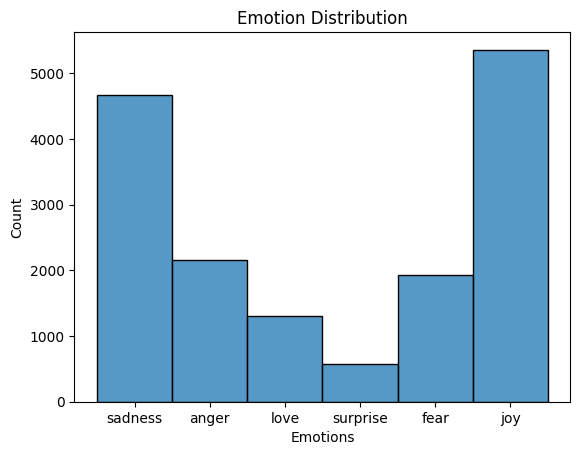

In [15]:
sns.histplot(data=train, x="label")
plt.title("Emotion Distribution")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()

### Text Preprocessing

In [16]:
lemmatizer = WordNetLemmatizer()

In [17]:
def cleaned_text(df, column):
    # Filtering the text
    df[column].replace("[^a-zA-Z]"," ",regex=True, inplace=True)
    for i in range(len(df[column])):
        # Lowering the text
        text = df[column][i].lower()
        # Spliting the text
        text = text.split()
        # Removing stopwords and then performing lemmatization
        text = [lemmatizer.lemmatize(word) for word in text if word not in set(stopwords.words("english"))]
        # Joining the words
        text = " ".join(text)
        df[column][i] = text
    return None

In [18]:
train['text'][:6]

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
5    ive been feeling a little burdened lately wasn...
Name: text, dtype: object

In [19]:
cleaned_text(train, "text")

In [20]:
train['text'][:6]

0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
5        ive feeling little burdened lately wasnt sure
Name: text, dtype: object

### Converting Labels to numeric values

In [21]:
encoder = LabelEncoder()

y_train = encoder.fit_transform(train['label'])
y_test = encoder.transform(test['label'])

In [22]:
pd.DataFrame(y_train).value_counts()

2    5362
4    4666
0    2159
1    1937
3    1304
5     572
dtype: int64

anger mapped to 0;
fear mapped to 1;
joy mapped to 2;
love mapped to 3;
sadness mapped to 4;
surprise mapped to 5

### Converting Words into Vectors

#### 1. Bag of Words

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
bow = CountVectorizer(ngram_range=(1,1))
X_train = bow.fit_transform(train['text'])
X_test = bow.transform(test['text'])

#### 2. Tf-Idf Vectorizer

In [25]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
# tfidf = TfidfVectorizer(ngram_range=(1,1))
# X_train = tfidf.fit_transform(train['text'])
# X_test = tfidf.transform(test['text'])

#### 3. Word2Vec

In [27]:
# import gensim
# from gensim.models import Word2Vec

In [28]:
# corpus = []

In [29]:
# for i in range(train.shape[0]):
#   text = train.iloc[i,0].split()
#   for j in range(len(text)):
#     corpus.append(text[j])

# for i in range(test.shape[0]):
#   text = test.iloc[i,0].split()
#   for j in range(len(text)):
#     corpus.append(text[j])

In [30]:
# len(corpus)

#### 3a. CBOW

In [31]:
# cbow = gensim.models.Word2Vec(corpus, min_count=1, vector_size=1000, window=5)

In [32]:
# def vectorize(text):
#   words = text.split()
#   words_vecs = [cbow.wv[word] for word in words if word in cbow.wv]
#   if len(words_vecs) == 0:
#     return(np.zeros(1000))
#   words_vecs = np.array(words_vecs)
#   return words_vecs.mean(axis=0)

In [33]:
# X_train = np.array([vectorize(text) for text in train['text']])
# X_test = np.array([vectorize(text) for text in test['text']])

#### 3b. Skip gram

In [34]:
# skipgram = gensim.models.Word2Vec(corpus, min_count=1, vector_size=200, window=5)

In [35]:
# def vectorize(text):
#   words = text.split()
#   words_vecs = [skipgram.wv[word] for word in words if word in skipgram.wv]
#   if len(words_vecs) == 0:
#     return(np.zeros(200))
#   words_vecs = np.array(words_vecs)
#   return words_vecs.mean(axis=0)

In [36]:
# X_train = np.array([vectorize(text) for text in train['text']])
# X_test = np.array([vectorize(text) for text in test['text']])

#### 4. Word2Vec Pre-trained Model

In [37]:
# import gensim.downloader as api

# wv = api.load("word2vec-google-news-300")

In [38]:
# wv = api.load("glove-twitter-200")

In [39]:
# def vectorize(text):
#   words = text.split()
#   words_vecs = []
#   for word in words:
#     try:
#       words_vecs.append(wv[word])
#     except KeyError:
#       words_vecs.append(np.zeros(200))
#   return np.array(words_vecs).mean(axis=0)

In [40]:
# X_train = np.array([vectorize(text) for text in train['text']])
# X_test = np.array([vectorize(text) for text in test['text']])

In [41]:
# X_train.shape

### Normalization

In [42]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### 1. Random Forest Classifier

#### Training our model

In [43]:
# from sklearn.ensemble import RandomForestClassifier
# forest = RandomForestClassifier()
# forest.fit(X_train, y_train)

#### Prediction for X_test

In [44]:
# y_pred = forest.predict(X_test)

#### Accuracy Score

In [45]:
# accuracy_score(y_test,y_pred)

#### Confusion Matrix

In [46]:
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt=".0f")
# plt.title("Confusion Matrix Heatmap")
# plt.show()

#### Classification Report

In [47]:
# print(classification_report(y_test,y_pred))

### 2. Multinomial Naive Bayes Classification

#### Training our model

In [48]:
# from sklearn.naive_bayes import MultinomialNB
# multinomial = MultinomialNB()

# multinomial.fit(X_train, y_train)

#### Prediction for X_test

In [49]:
# y_pred = multinomial.predict(X_test)

#### Accuracy Score

In [50]:
# accuracy_score(y_test,y_pred)

#### Confusion Matrix

In [51]:
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt=".0f")
# plt.title("Confusion Matrix Heatmap")
# plt.show()

#### Classification Report

In [52]:
# print(classification_report(y_test,y_pred))

### 3. Logistic Regression

#### Training the model

In [53]:
from sklearn.linear_model import LogisticRegressionCV
logistic = LogisticRegressionCV()

logistic.fit(X_train, y_train)

LogisticRegressionCV()

#### Prediction for X_test

In [54]:
y_pred = logistic.predict(X_test)

#### Accuracy Score

In [55]:
accuracy_score(y_test,y_pred)

0.897

#### Confusion Matrix

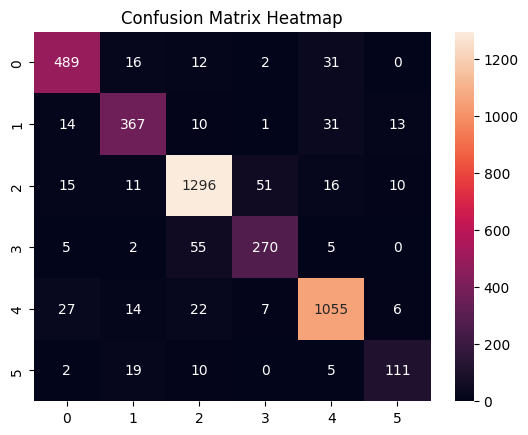

In [56]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.title("Confusion Matrix Heatmap")
plt.show()

#### Classification Report

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       550
           1       0.86      0.84      0.85       436
           2       0.92      0.93      0.92      1399
           3       0.82      0.80      0.81       337
           4       0.92      0.93      0.93      1131
           5       0.79      0.76      0.77       147

    accuracy                           0.90      4000
   macro avg       0.87      0.86      0.86      4000
weighted avg       0.90      0.90      0.90      4000



### 4. Gradient Boosting Classifier

#### Training our model

In [58]:
# from sklearn.ensemble import GradientBoostingClassifier

# grad = GradientBoostingClassifier()

# grad.fit(X_train, y_train)

#### Prediction for X_test

In [59]:
# y_pred = grad.predict(X_test)

#### Accuracy Score

In [60]:
# accuracy_score(y_test,y_pred)

#### Confusion Matrix

In [61]:
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt=".0f")
# plt.title("Confusion Matrix Heatmap")
# plt.show()

#### Classification Report

In [62]:
# print(classification_report(y_test,y_pred))

### 5. SVC

#### Training our model

In [63]:
# from sklearn.svm import SVC

# svc = SVC()

# svc.fit(X_train, y_train)

#### Prediction for X_test

In [64]:
# y_pred = svc.predict(X_test)

#### Accuracy Score

In [65]:
# accuracy_score(y_test,y_pred)

#### Confusion Matrix

In [66]:
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt=".0f")
# plt.title("Confusion Matrix Heatmap")
# plt.show()

#### Classification Report

In [67]:
# print(classification_report(y_test,y_pred))

### Saving our model

In [68]:
import pickle

with open('model.pkl', 'wb') as f:
  pickle.dump(logistic, f)

In [69]:
with open('vectorizer.pkl', 'wb') as f:
  pickle.dump(bow, f)